# Dijkstra 原理說明
* Dijkstra演算法算是單源最短路徑(Single Souce Shortest Path)的一種方法，計算一個節點到其他所有節點的最短路徑，主要特點是以起始點為中心向外層層擴展，直到擴展到終點為止且沒有負權邊
* 時間複雜度：
    * 若使用Binary Heap，需要O((E+V)logV)
    * 若使用Fibonacci Heap，只需要O(E+VlogV)
* 以下是dijkstra演算法的步驟：
    * 至起始點找尋尚未拜訪的相鄰結點
    * 更新最短路徑表
    * 找尋目前未拜訪的最短路徑結點，將此結點設為起始點，並設為已拜訪(已得到最短路徑)
    * 重複第一步，直到所有結點皆為已拜訪
* 小結
    * 若權值皆不為負，使用Dijkstra演算法可以找到最短路徑的最佳解，不過因走訪的節點太多，故效率不佳

# Kruskal 原理說明
* Kruskal演算法是一個計算最小生成樹(Minimum Spaning Tree)的方法，按照邊的權重順序（從小到大）將邊加入生成樹中，但是若加入該邊會與生成樹形成環(cycle)則不加入該邊，直到樹中含有「頂點個數-1」條邊為止
* 時間複雜度：O(nlogn)
* 以下是kruskal演算法的步驟：
    * 將每個頂點放入其自身的資料集合中
    * 按照權值的升序由小至大選擇邊
    * 選擇每條邊時，判斷定義邊的頂點是否在不同的資料集中，若是，將此邊插入最小生成樹的集合中，同時，將集合中包含每個頂點的聯合體取出
    * 若不是，移動到下一條邊
    * 重複上述過程直到所有邊都探查過
* 小結
    * Kruskal演算法主要是針對邊來展開，邊數少時效率會非常高，對於稀疏圖有很大的優勢

# Dijkstra 流程圖

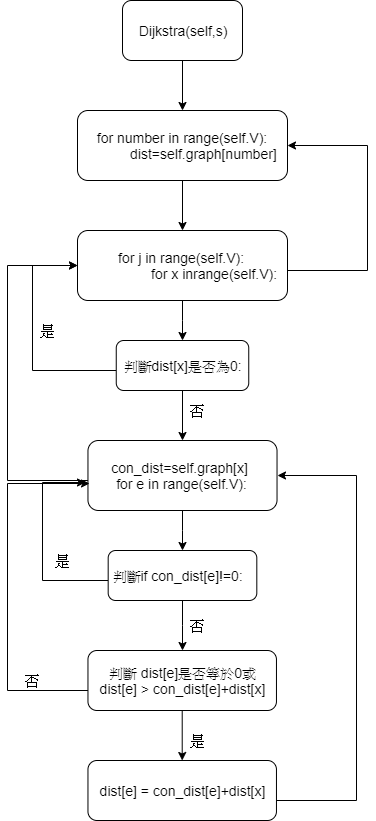

In [38]:
Image(filename="C:/Users/USER/Desktop/dijk.png")

# Kruskal 流程圖

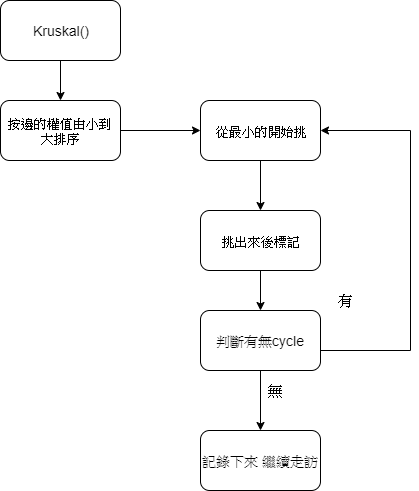

In [1]:
from IPython.display import Image
Image(filename="C:/Users/USER/Desktop/Kruskal.png")

# 學習歷程
* 首先，這次作業真的很難！我上課聽老師介紹整個流程就有點不解，之後上網找了很多介紹影片和文章才開始有了初步的了解
* 再來我到老師上課的投影片下載作業程式碼範例，一開始就不太懂怎麼會用矩陣的方式存放？後來發現作業的格式是矩陣裡面放「各點到點的距離」，而不是每執行一輪後的陣列，以下是`__init__`的定義：

In [1]:
from collections import defaultdict
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]

* 雖然和老師上課講解的不一樣，不過概念是一樣的，只是用不同方式呈現，於是我就開始構思了
* 我想說先寫一個`recursive`的def，裡面放之後要跑的迴圈
* 第一個迴圈：是看vertices有幾個，就執行幾次，之後把它賦予到dist裡
* 第二個迴圈：是將第一個迴圈跑出來的陣列給予編號，依序再跑下一個迴圈的指令
* 第三個迴圈：是看裡面的值，若值不等於0，表示該點有相連接的點，就將該點放進另外一個list裡(con_dist)
* 第四個迴圈：執行判斷句，若con_dist裡的值不為0，，再判斷原dist裡的值是否為0
* 若為0，則將起始點到非0值的點的距離+非0值的點到該點的距離，簡單說就是起始點到中繼點的距離+中繼點到該點的距離
* 此外，若是起始點到中繼點的距離+中繼點到該點的距離 < 起始點直接到該點的距離，則將值更改
* 以下為程式碼

In [3]:
from collections import defaultdict
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
        
    def Recursive(self, s): 
        for number in range(self.V):
            dist=self.graph[number]  
            for j in range(self.V): 
                for x in range(self.V):
                    if dist[x]!=0: 
                        con_dist=self.graph[x] 
                        for e in range(self.V):
                            if con_dist[e]!=0:  
                                if dist[e]==0: 
                                    dist[e]=con_dist[e]+dist[x] 
                                elif dist[e] > con_dist[e]+dist[x]: 
                                    dist[e]=con_dist[e]+dist[x] 
            return dist

* 以下是助教給的測資，先試看看跑出來的東西，是不是跟我想的一樣的

In [35]:
g = Graph(9) 
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0], 
           [4, 0, 8, 0, 0, 0, 0, 11, 0], 
           [0, 8, 0, 7, 0, 4, 0, 0, 2], 
           [0, 0, 7, 0, 9, 14, 0, 0, 0], 
           [0, 0, 0, 9, 0, 10, 0, 0, 0], 
           [0, 0, 4, 14, 10, 0, 2, 0, 0], 
           [0, 0, 0, 0, 0, 2, 0, 1, 6], 
           [8, 11, 0, 0, 0, 0, 1, 0, 7], 
           [0, 0, 2, 0, 0, 0, 6, 7, 0] 
           ]

In [5]:
g.Recursive(0)

[8, 4, 12, 19, 21, 11, 9, 8, 14]

* 比對一下上課練習的結果，登愣！竟然對九成，唯一錯的就是自己到自己的距離，那我再修一下並且放進Dijkstra這個def裡

In [20]:
from collections import defaultdict
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
        
    def Recursive(self, s): 
        for number in range(self.V):
            dist=self.graph[number]  
            for j in range(self.V): 
                for x in range(self.V):
                    if dist[x]!=0: 
                        con_dist=self.graph[x] 
                        for e in range(self.V):
                            if con_dist[e]!=0:  
                                if dist[e]==0: 
                                    dist[e]=con_dist[e]+dist[x] 
                                elif dist[e] > con_dist[e]+dist[x]: 
                                    dist[e]=con_dist[e]+dist[x] 
            return dist
    
    def Dijkstra(self,s):
        final_dist={}
        self.Recursive(s)
        for num in range(self.V):
            self.graph[num][num]=0 
            final_dist[str(num)] = self.graph[s][num]
        return final_dist

In [21]:
g.Dijkstra(0)

{'0': 0, '1': 4, '2': 12, '3': 19, '4': 21, '5': 11, '6': 9, '7': 8, '8': 14}

* 那我就換個起始點試看看，結果…

In [22]:
g.Dijkstra(1)

{'0': 4, '1': 0, '2': 8, '3': 0, '4': 0, '5': 0, '6': 0, '7': 11, '8': 0}

* 跑出來這甚麼鬼！怎麼跟我自己推出來的不一樣？以下是我推出來的結果{4,0,8,15,22,12,12,11,10}

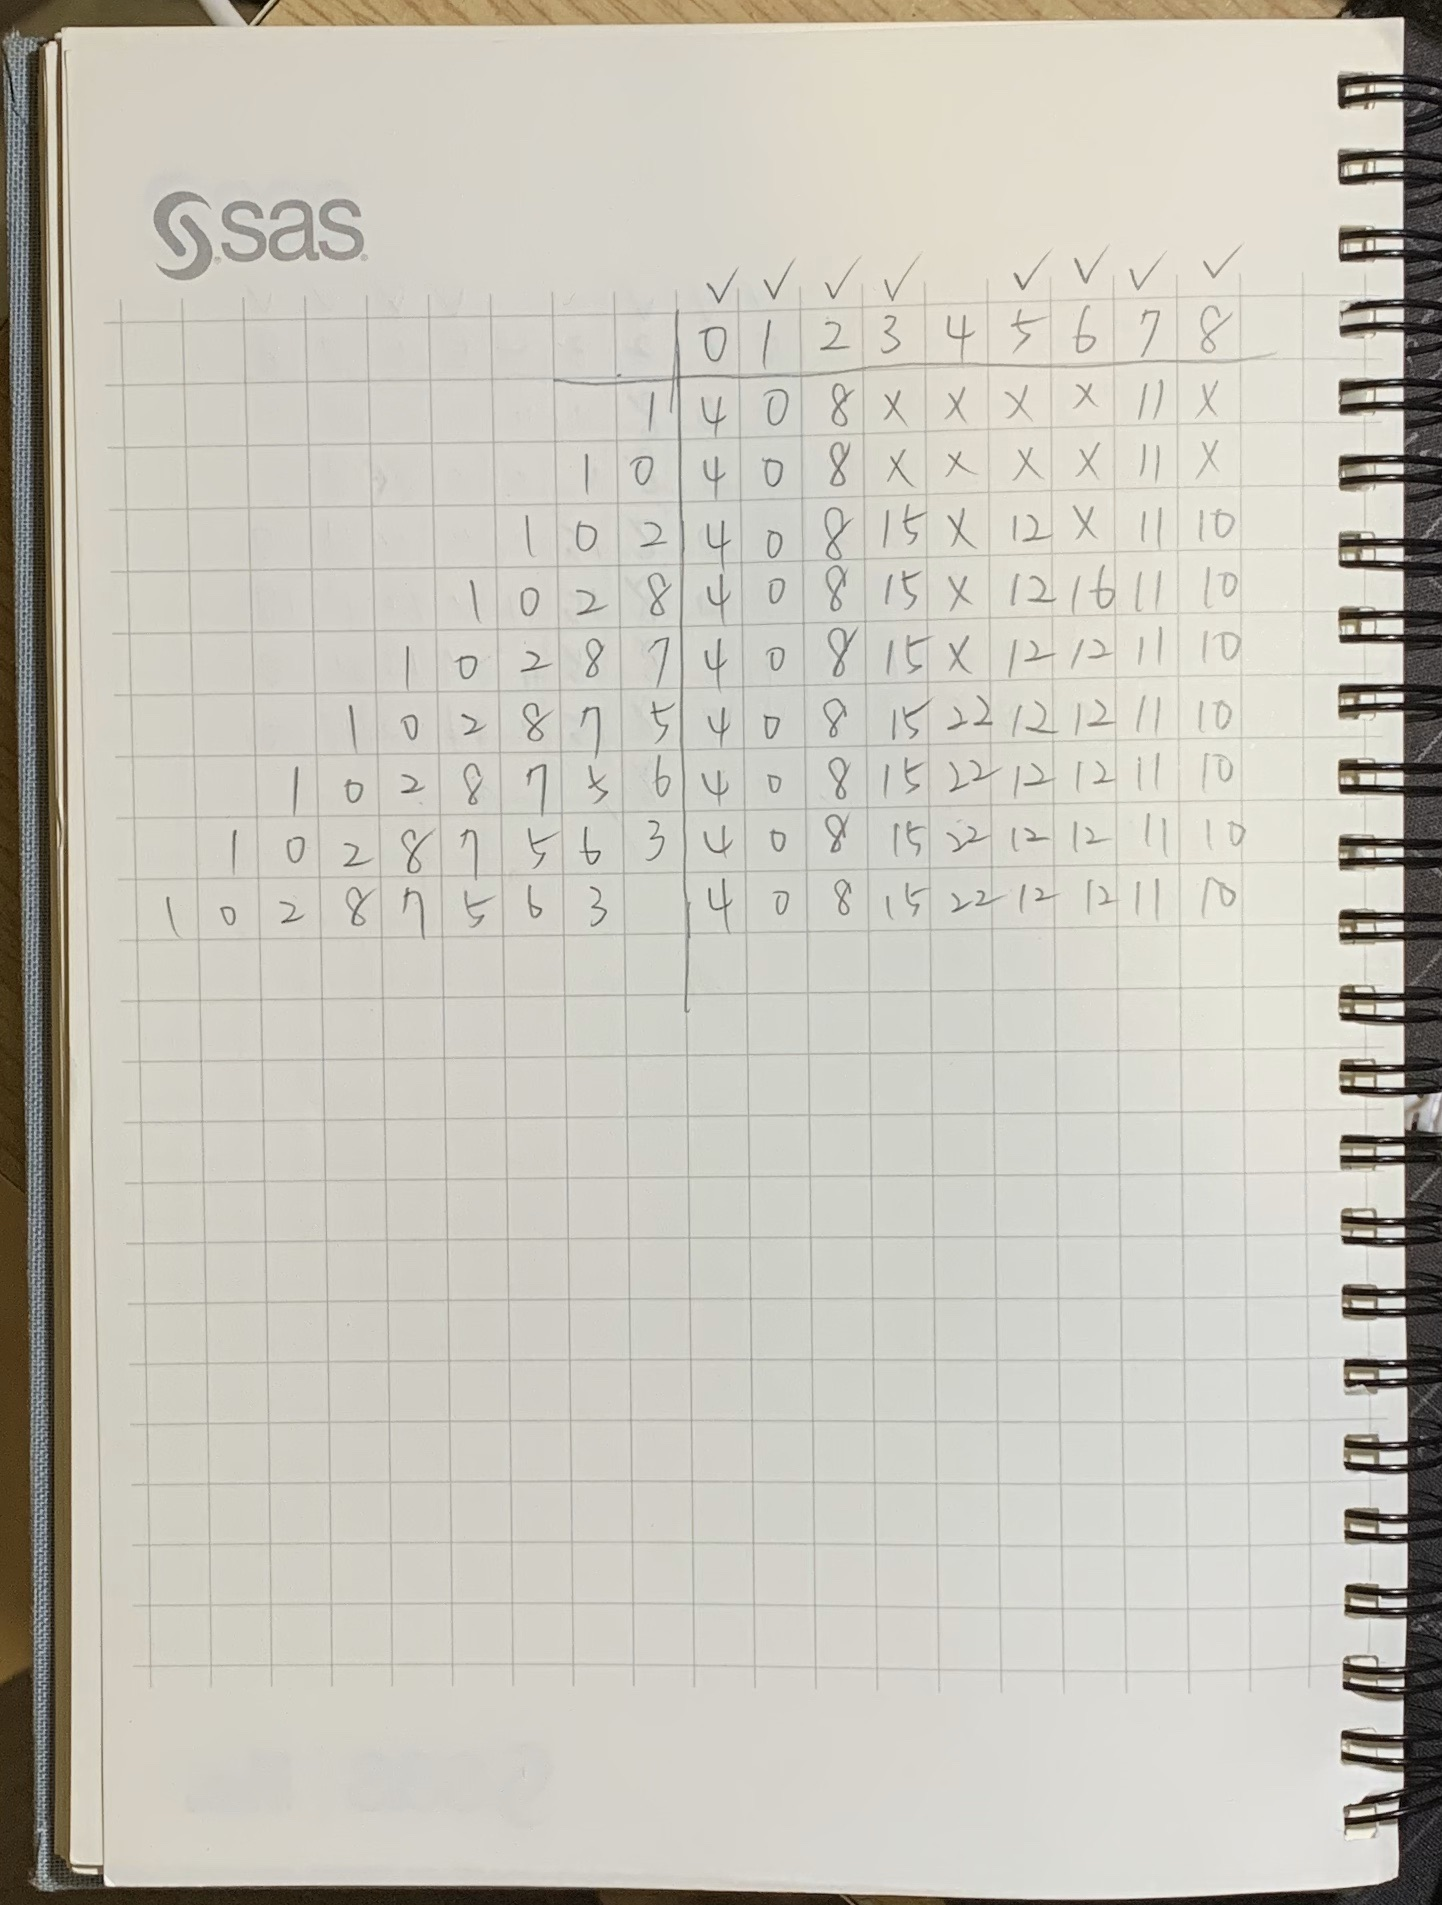

In [23]:
from IPython.display import Image
Image(filename="C:/Users/USER/Desktop/Dijkstra.jpg")

* 那我再改，把原本`return dist`那邊去掉試看看

In [34]:
from collections import defaultdict
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
        
    def Recursive(self, s): 
        for number in range(self.V):
            dist=self.graph[number]  
            for j in range(self.V): 
                for x in range(self.V):
                    if dist[x]!=0: 
                        con_dist=self.graph[x] 
                        for e in range(self.V):
                            if con_dist[e]!=0:  
                                if dist[e]==0: 
                                    dist[e]=con_dist[e]+dist[x] 
                                elif dist[e] > con_dist[e]+dist[x]: 
                                    dist[e]=con_dist[e]+dist[x]
    
    def Dijkstra(self,s):
        final_dist={}
        self.Recursive(s)
        for num in range(self.V):
            self.graph[num][num]=0 
            final_dist[str(num)] = self.graph[s][num]
        return final_dist

In [36]:
g.Dijkstra(1)

{'0': 4, '1': 0, '2': 8, '3': 15, '4': 22, '5': 12, '6': 12, '7': 11, '8': 10}

* 果然是那裡出問題！不過還好沒有錯得太嚴重哈哈，爽！

# 參考資料
* [代克思托演算法 (Dijkstra's algorithm)](http://nthucad.cs.nthu.edu.tw/~yyliu/personal/nou/04ds/dijkstra.html)
* [Dijkstra算法原理](https://blog.csdn.net/yalishadaa/article/details/55827681)
* [Single-Source Shortest Path：Dijkstra's Algorithm](http://alrightchiu.github.io/SecondRound/single-source-shortest-pathdijkstras-algorithm.html)
* [dijkstra演算法](http://dreamisadream97.pixnet.net/blog/post/168577620-dijkstra%E6%BC%94%E7%AE%97%E6%B3%95)
* [Kruskal演算法](https://www.itread01.com/content/1545066724.html)
* [Minimum Spanning Tree：Kruskal's Algorithm](http://alrightchiu.github.io/SecondRound/minimum-spanning-treekruskals-algorithm.html)
* [克魯斯克爾演算法 (Kruskal's algorithm)](http://nthucad.cs.nthu.edu.tw/~yyliu/personal/nou/04ds/kruskal.html)
* [圖形演算法-最小生成樹](https://sites.google.com/site/zsgititit/home/jin-jiec-cheng-shi-she-ji-2/zui-xiao-sheng-cheng-shu)